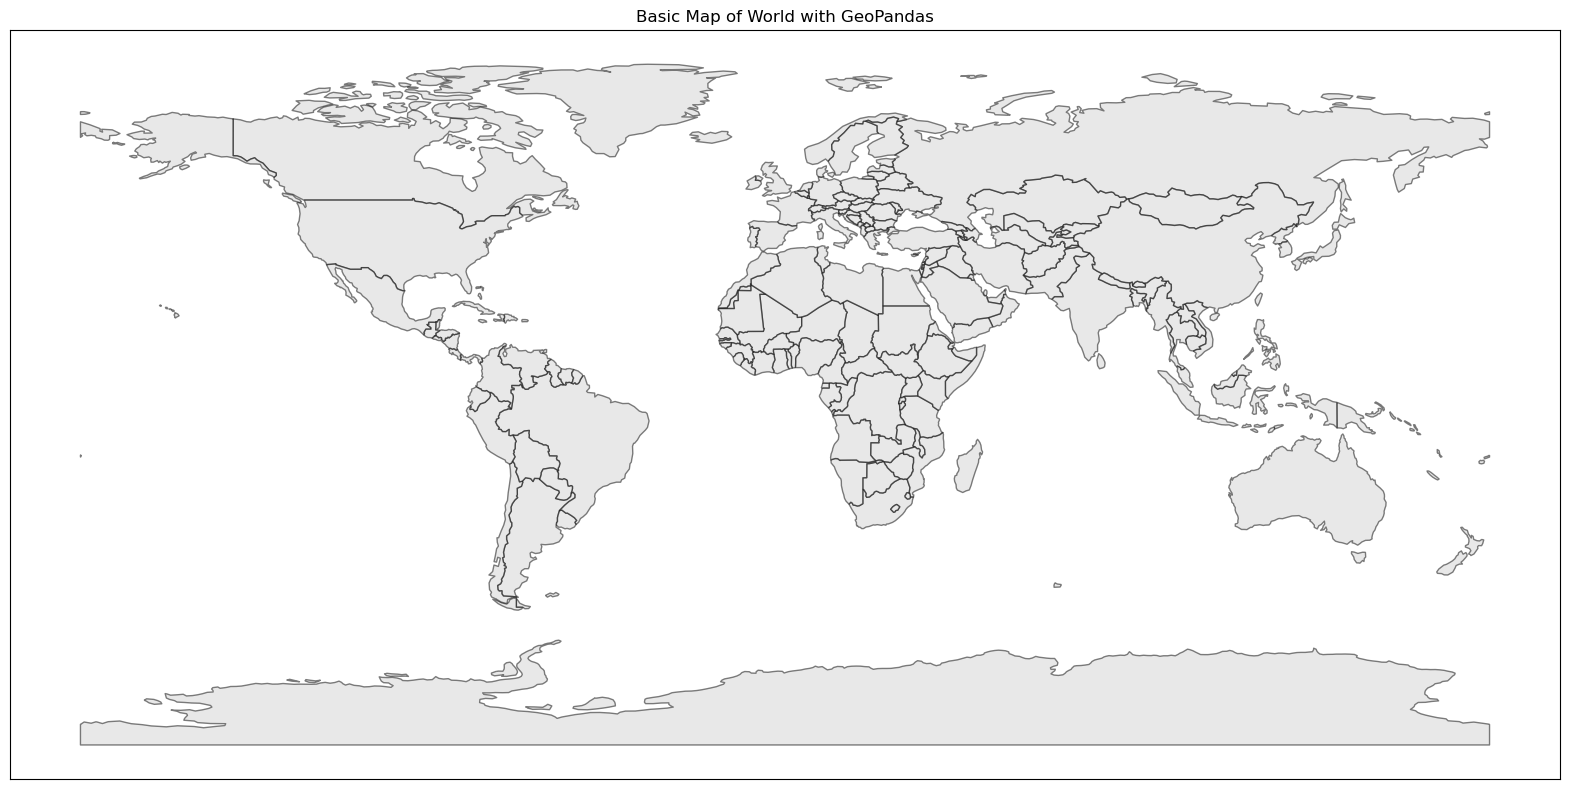

In [2]:
# import the necessary packages
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# load the low resolution world map
world = gpd.read_file('../data/map/ne_110m_admin_0_countries.shp')
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# plot a basic map of the world
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Basic Map of World with GeoPandas")
plt.show()

In [3]:
import IPython
from IPython.display import display, HTML

#print(world.head(10))
#print(world['SOVEREIGNT'])
# Filter countries with more than 20 million inhabitants
#large_countries = world[world['POP_EST'] > 200000000]
#print(large_countries['SOVEREIGNT'])
# Display the columns of the world GeoDataFrame in a scrollable format

# Convert the columns to a list and display them in a scrollable div
columns_html = "<div style='height: 200px; overflow-y: scroll; border: 1px solid black; padding: 10px;'>" + "<br>".join(world.columns) + "</div>"
display(HTML(columns_html))

                                            geometry      CONTINENT  \
0  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...        Oceania   
1  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...         Africa   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...         Africa   
3  MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...  North America   
4  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...  North America   

       POP_EST                   SOVEREIGNT  
0     889953.0                         Fiji  
1   58005463.0  United Republic of Tanzania  
2     603253.0               Western Sahara  
3   37589262.0                       Canada  
4  328239523.0     United States of America  


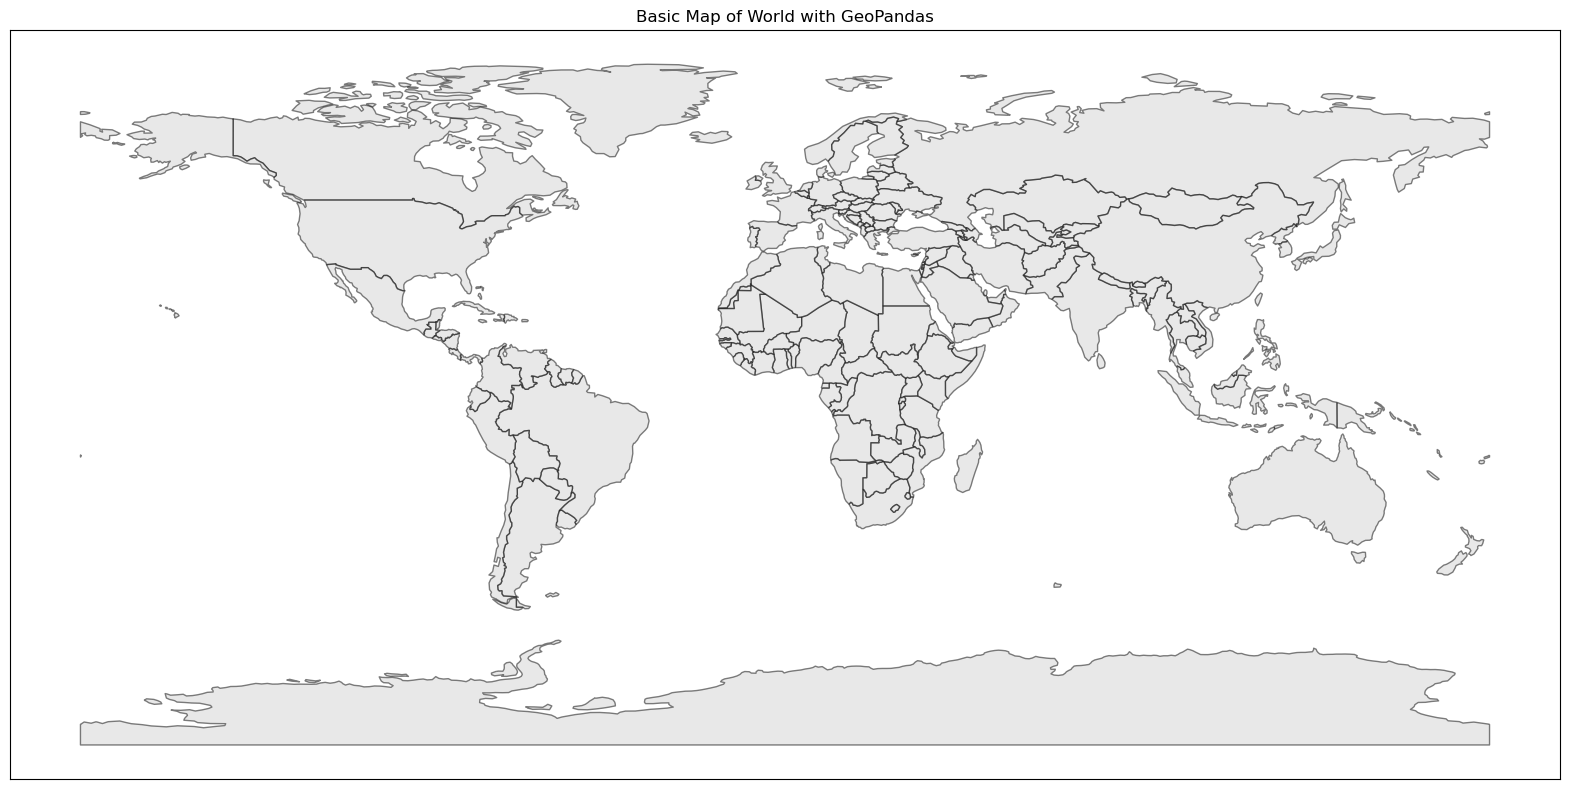

In [4]:
# Create a new GeoDataFrame world_cleaned with selected columns
world_cleaned = world[['geometry', 'CONTINENT', 'POP_EST', 'SOVEREIGNT']]
print(world_cleaned.head())

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# plot a basic map of the world
world_cleaned.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Basic Map of World with GeoPandas")
plt.show()

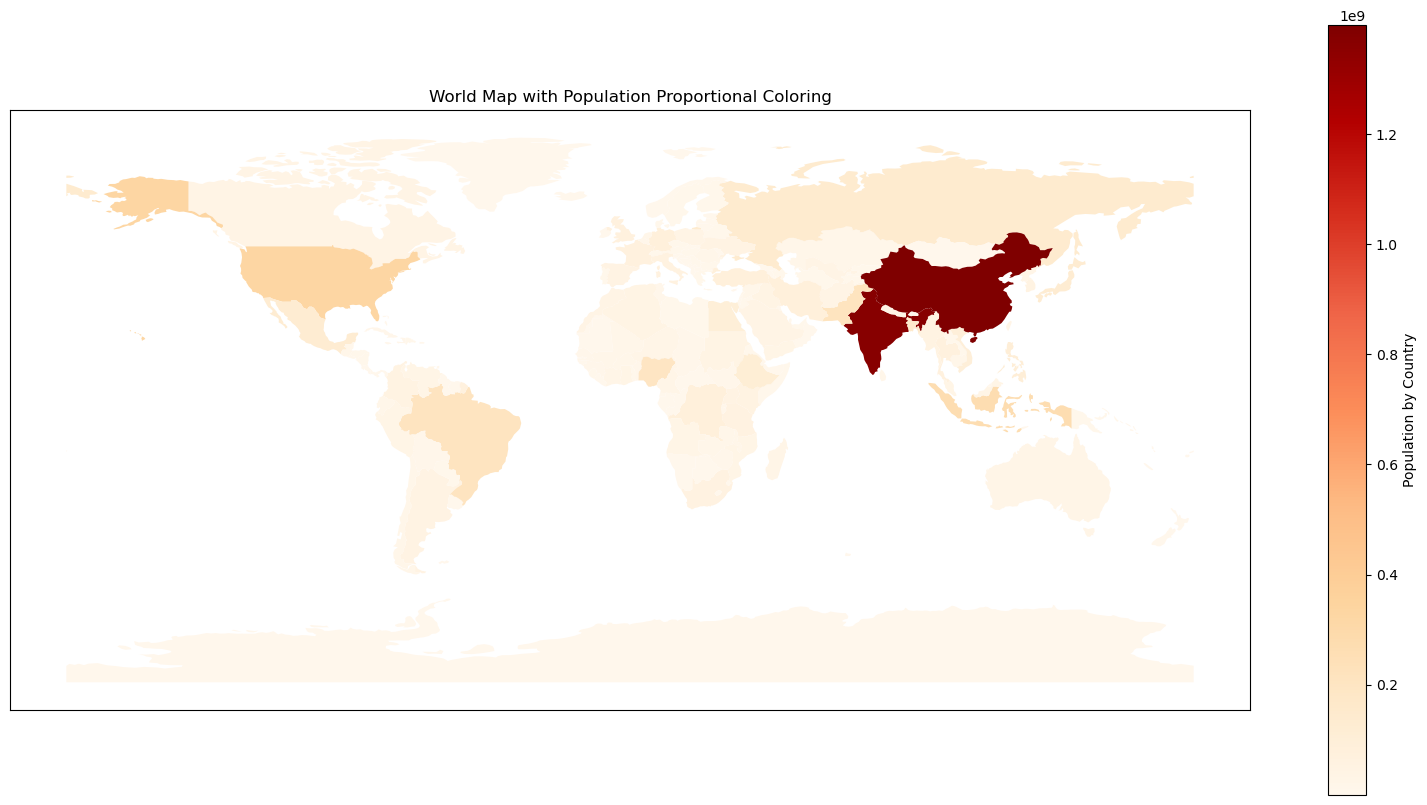

In [5]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# plot the world_cleaned map with color proportional to POP_EST
world_cleaned.plot(
    ax=ax,
    column='POP_EST',
    cmap='OrRd',
    legend=True,
    legend_kwds={'label': "Population by Country"}
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("World Map with Population Proportional Coloring")
plt.show()

On a un problème avec les noms des pays des films qui ne correspondent pas, on va donc régler ça !

In [11]:
import json
import pandas as pd

print(world['SOVEREIGNT'])
# Convert the SOVEREIGNT values to a list and display them in a scrollable div
sov_html = "<div style='height: 200px; overflow-y: scroll; border: 1px solid black; padding: 10px;'>" + "<br>".join(world['SOVEREIGNT']) + "</div>"
display(HTML(sov_html))
# Load and print the dictionary from the file
with open('../data/freebaseIdDictionnaries/countries', 'r') as file:
    countries_dict = json.load(file)

# make countries_dict a pandas DataFrame
countries_df = pd.DataFrame(countries_dict.items())

# rename the columns of the DataFrame
countries_df.columns = ['code', 'SOVEREIGNT']

# Count the number of values in countries_df
num_values = world_cleaned['SOVEREIGNT'].count()

# Find matching SOVEREIGNT values
matching_sov = world_cleaned[world_cleaned['SOVEREIGNT'].isin(countries_df['SOVEREIGNT'])]['SOVEREIGNT'].tolist()
#print(matching_sov)

#print the size of the matching SOVEREIGNT values
num_matching_sov = len(matching_sov)
#print(num_matching_sov)
# Delete the lines of world_cleaned['SOVEREIGNT'] that are not in countries_df
world_cleaned = world_cleaned[world_cleaned['SOVEREIGNT'].isin(countries_df['SOVEREIGNT'])]

# Find and print the SOVEREIGNT values in countries_df that are not in world_cleaned
non_matching_sov = countries_df[~countries_df['SOVEREIGNT'].isin(world_cleaned['SOVEREIGNT'])]['SOVEREIGNT']
#print(non_matching_sov)

# Find and print the SOVEREIGNT values in world_cleaned that are not in countries_df
non_matching_sov2 = world[~world['SOVEREIGNT'].isin(countries_df['SOVEREIGNT'])]['SOVEREIGNT']
#print(non_matching_sov2)
# Convert the non_matching_sov2 to a list and display them in a scrollable div
non_matching_sov2_html = "<div style='height: 200px; overflow-y: scroll; border: 1px solid black; padding: 10px;'>" + "<br>".join(non_matching_sov2) + "</div>"
#display(HTML(non_matching_sov2_html))

0                             Fiji
1      United Republic of Tanzania
2                   Western Sahara
3                           Canada
4         United States of America
                  ...             
172             Republic of Serbia
173                     Montenegro
174                         Kosovo
175            Trinidad and Tobago
176                    South Sudan
Name: SOVEREIGNT, Length: 177, dtype: object


In [28]:
united_states_of_america = ['Puerto Rico']
uzbekistan = ['Uzbek SSR']
democratic_republic_of_the_congo = ['Congo']
russia = ['Soviet Union', 'Crime', 'Ukrainian SSR', 'Ukranian SSR', 'Georgian SSR', 'Soviet occupation zone']
the_bahamas = ['Bahamas','Aruba']
united_kingdom = ['England', 'Northern Ireland', 'Scotland', 'Wales', 'Isle of Man', 'Kingdom of Great Britain']
france = ['Monaco']
israel = ['Mandatory Palestine', 'Palestinian territories', 'Palestinian Territories']
iraq = ['Iraqi Kurdistan']
myanmar = ['Burma']
south_korea = ['Korea']
india = ['Malayalam Language']
germany = ['German Democratic Republic', 'West Germany', 'Nazi Germany', 'Weimar Republic', 'German Language']
china = ['Hong Kong', 'Macau', 'Republic of China']
italy = ['Kingdom of Italy','Malta']
slovenia = ['Yugoslavia', 'Socialist Federal Republic of Yugoslavia', 'Federal Republic of Yugoslavia']
slovakia = ['Slovak Republic']
czechia = ['Czech Republic', 'Czechoslovakia']
north_macedonia = ['Republic of Macedonia']
republic_of_serbia = ['Serbia', 'Serbia and Montenegro']
qatar = ['Bahrain']
malaysia = ['Singapore']

# Create a copy of the dictionary countries_dict
countries_dict_copy = countries_dict.copy()

# Replace every value in the lists above by the list title
for key, value in countries_dict_copy.items():
    if value in united_states_of_america:
        countries_dict_copy[key] = 'United States of America'
    elif value in uzbekistan:
        countries_dict_copy[key] = 'Uzbekistan'
    elif value in democratic_republic_of_the_congo:
        countries_dict_copy[key] = 'Democratic Republic of the Congo'
    elif value in russia:
        countries_dict_copy[key] = 'Russia'
    elif value in the_bahamas:
        countries_dict_copy[key] = 'The Bahamas'
    elif value in united_kingdom:
        countries_dict_copy[key] = 'United Kingdom'
    elif value in france:
        countries_dict_copy[key] = 'France'
    elif value in israel:
        countries_dict_copy[key] = 'Israel'
    elif value in iraq:
        countries_dict_copy[key] = 'Iraq'
    elif value in myanmar:
        countries_dict_copy[key] = 'Myanmar'
    elif value in south_korea:
        countries_dict_copy[key] = 'South Korea'
    elif value in india:
        countries_dict_copy[key] = 'India'
    elif value in germany:
        countries_dict_copy[key] = 'Germany'
    elif value in china:
        countries_dict_copy[key] = 'China'
    elif value in italy:
        countries_dict_copy[key] = 'Italy'
    elif value in slovenia:
        countries_dict_copy[key] = 'Slovenia'
    elif value in slovakia:
        countries_dict_copy[key] = 'Slovakia'
    elif value in czechia:
        countries_dict_copy[key] = 'Czechia'
    elif value in north_macedonia:
        countries_dict_copy[key] = 'North Macedonia'
    elif value in republic_of_serbia:
        countries_dict_copy[key] = 'Republic of Serbia'
    elif value in qatar:
        countries_dict_copy[key] = 'Qatar'
    elif value in malaysia:
        countries_dict_copy[key] = 'Malaysia'

In [29]:
countries_cleaned_df = pd.DataFrame(countries_dict_copy.items())
countries_cleaned_df.columns = ['code', 'SOVEREIGNT']
non_matching_sov = countries_df[~countries_cleaned_df['SOVEREIGNT'].isin(world['SOVEREIGNT'])]['SOVEREIGNT']
print(non_matching_sov)

Series([], Name: SOVEREIGNT, dtype: object)
